### Extract,Visualize and Create the dataframe of the Input and output data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

In [2]:
def csv_file_creater(folder_path):
    csv_pattern = os.path.join(folder_path,"*.csv")
    csv_files = glob.glob(csv_pattern)
    return csv_files

In [3]:
folder_path = "./mds2-3325/Spectroscopy/NearInfrared/Benchtop_N/Absorbance/Source_A/"
csv_files_1 = csv_file_creater(folder_path)
folder_path_2 = "./mds2-3325/Spectroscopy/NearInfrared/Benchtop_N/Absorbance/Source_B/"
csv_files_2 = csv_file_creater(folder_path_2)
folder_path_3 = "./mds2-3325/Spectroscopy/NearInfrared/Benchtop_N/Absorbance/Source_C/"
csv_files_3 = csv_file_creater(folder_path_3)

In [4]:
folder_path_1_ref = "./mds2-3325/Spectroscopy/NearInfrared/Benchtop_N/Reflectance/Source_A/"
folder_path_2_ref = "./mds2-3325/Spectroscopy/NearInfrared/Benchtop_N/Reflectance/Source_B/"
folder_path_3_ref = "./mds2-3325/Spectroscopy/NearInfrared/Benchtop_N/Reflectance/Source_C/"

csv_files_1_ref = csv_file_creater(folder_path_1_ref)
csv_files_2_ref = csv_file_creater(folder_path_2_ref)
csv_files_3_ref = csv_file_creater(folder_path_3_ref)


In [5]:
fabric_types = {"a":"Cotton",
                "b":"Polyester",
                "c":"Nylon",
                "d":"Acrylic",
                "e":"Spandex",
                "f":"Recycled Polyester",
                "g":"Rayan",
                "x":"Empty"}

fabric_sample_type = []
fabric_sample_composition = []
fabric_type_sysmble = ["a","b","c","d","e","f","g","x"]

def fabric_classification(csv_file,fabric_sample_type,fabric_sample_composition):
    for file_path in csv_file:
        fabric_type_array = []
        fabric_composition = []
        file_name  = os.path.basename(file_path)
        file_name_part = file_name.split("_")
        blend = file_name_part[1]
        sep_blend = [blend[i:i+4] for i in range(0, len(blend), 4)]
        for j in sep_blend:
            for i in fabric_type_sysmble:
                if i == j[0]:
                    fabric_type_array += [fabric_types[i]]
                    fabric_composition += [j[1:]]
                    break
        fabric_sample_type +=[fabric_type_array]
        fabric_sample_composition += [fabric_composition]
    
   

In [6]:
def fabric_df(fabric_sample_type,fabric_sample_composition):
    fabric_type_df = pd.DataFrame(fabric_sample_type,columns=["Fabric_1","Fabric_2","Fabric_3"])
    fabric_composition_df = pd.DataFrame(fabric_sample_composition,columns=["Fabric_1_comp","Fabric_2_comp","Fabric_3_comp"])
    merged_fabric_data_df = pd.concat([fabric_type_df,fabric_composition_df],axis=1)
    return merged_fabric_data_df

In [7]:
fabric_classification(csv_files_1,fabric_sample_type,fabric_sample_composition)
fabric_classification(csv_files_2,fabric_sample_type,fabric_sample_composition)
fabric_classification(csv_files_3,fabric_sample_type,fabric_sample_composition)
fabric_classification(csv_files_1_ref,fabric_sample_type,fabric_sample_composition)
fabric_classification(csv_files_2_ref,fabric_sample_type,fabric_sample_composition)
fabric_classification(csv_files_3_ref,fabric_sample_type,fabric_sample_composition)

In [8]:
merged_fabric_data_df_absorbtion = fabric_df(fabric_sample_type,fabric_sample_composition)

In [9]:
merged_fabric_data_df_absorbtion

,Fabric_1,Fabric_2,Fabric_3,Fabric_1_comp,Fabric_2_comp,Fabric_3_comp
0,Cotton,Empty,Empty,100,000,000
1,Cotton,Empty,Empty,100,000,000
2,Cotton,Empty,Empty,100,000,000
3,Cotton,Empty,Empty,100,000,000
4,Cotton,Empty,Empty,100,000,000
...,...,...,...,...,...,...
813,Cotton,Polyester,Empty,052,048,000
814,Cotton,Polyester,Empty,052,048,000
815,Cotton,Polyester,Empty,052,048,000
816,Cotton,Polyester,Empty,052,048,000


In [10]:
merged_fabric_data_df_absorbtion_cpy = merged_fabric_data_df_absorbtion.copy()
uniq_df_abs = merged_fabric_data_df_absorbtion_cpy.drop_duplicates(subset=["Fabric_1","Fabric_2","Fabric_3"],keep="first")
uniq_df_abs


,Fabric_1,Fabric_2,Fabric_3,Fabric_1_comp,Fabric_2_comp,Fabric_3_comp
0,Cotton,Empty,Empty,100,000,000
151,Polyester,Empty,Empty,100,000,000
170,Acrylic,Empty,Empty,100,000,000
176,Nylon,Empty,Empty,100,000,000
203,Cotton,Spandex,Empty,092,008,000
210,Polyester,Spandex,Empty,088,012,000
217,Nylon,Spandex,Empty,081,019,000
224,Cotton,Polyester,Empty,050,050,000
231,Polyester,Cotton,Empty,065,035,000
301,Cotton,Recycled Polyester,Empty,060,040,000


In [11]:
# fabric_sample_type_reflect = []
# fabric_sample_composition_reflect = []

In [12]:
# folder_path_1_ref = "./mds2-3325/Spectroscopy/NearInfrared/Benchtop_N/Reflectance/Source_A/"
# folder_path_2_ref = "./mds2-3325/Spectroscopy/NearInfrared/Benchtop_N/Reflectance/Source_B/"
# folder_path_3_ref = "./mds2-3325/Spectroscopy/NearInfrared/Benchtop_N/Reflectance/Source_C/"


In [13]:
# csv_files_1_ref = csv_file_creater(folder_path_1_ref)
# csv_files_2_ref = csv_file_creater(folder_path_2_ref)
# csv_files_3_ref = csv_file_creater(folder_path_3_ref)

In [14]:
# fabric_classification(csv_files_1_ref,fabric_sample_type_reflect,fabric_sample_composition_reflect)
# fabric_classification(csv_files_2_ref,fabric_sample_type_reflect,fabric_sample_composition_reflect)
# fabric_classification(csv_files_3_ref,fabric_sample_type_reflect,fabric_sample_composition_reflect)
# fabric_

In [15]:
# merged_fabric_data_df_reflection = fabric_df(fabric_sample_type_reflect,fabric_sample_composition_reflect)

In [16]:
# merged_fabric_data_df_reflection

### Data Visulaization

In [17]:

def figure_plot(csv_files,Y_axis):

    plt.figure(figsize=(10, 6))

    for file_path in csv_files:
        df = pd.read_csv(file_path,header=None)

        df[0] = np.power(10, 7)/df[0]

        if (Y_axis == "Absorbance"):
            y= np.power(10,-df[1])*100
        
        else:
            y = df[1]
        
        x= df[0]

        plt.plot(x, y, label=os.path.basename(file_path))
        

    plt.xlabel("Wavelength (nm)")
    plt.ylabel(f"{Y_axis} (%)")
    plt.title(f"{Y_axis} Spectra")
    plt.grid(True)
    plt.show()

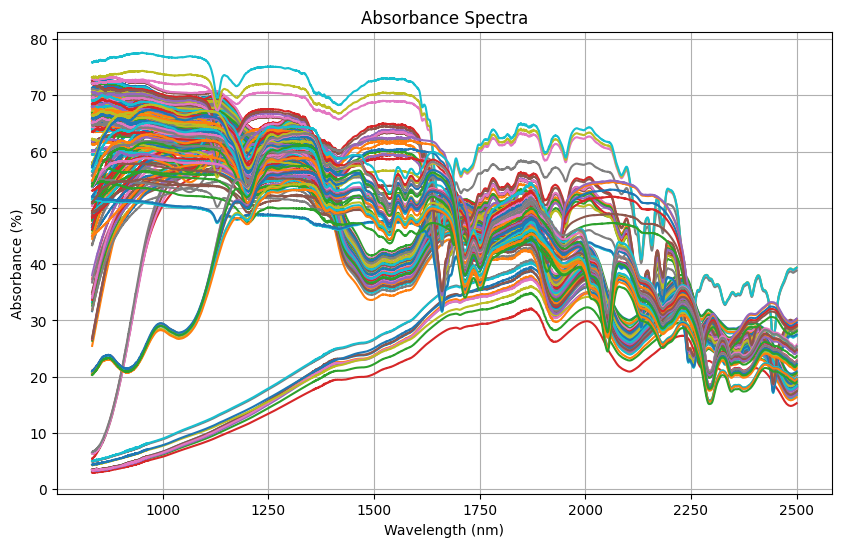

In [18]:
figure_plot(csv_files_1,"Absorbance")

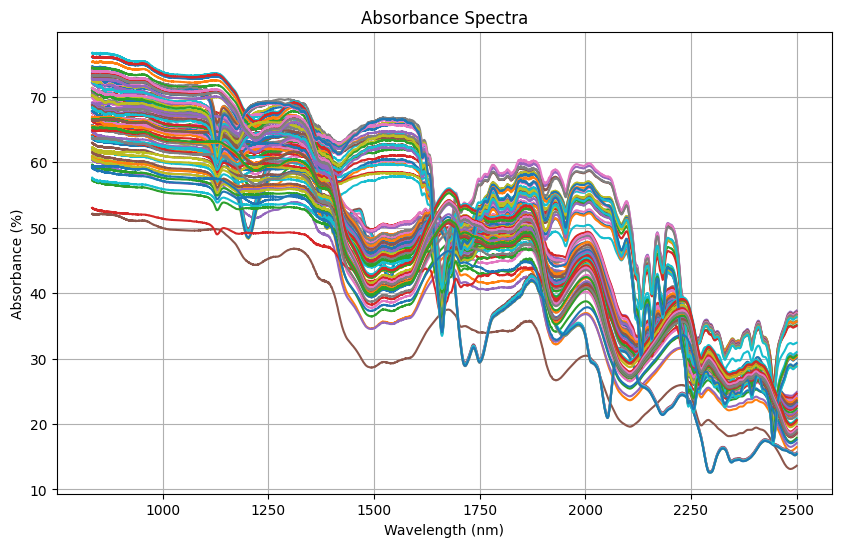

In [19]:
figure_plot(csv_files_2,"Absorbance")

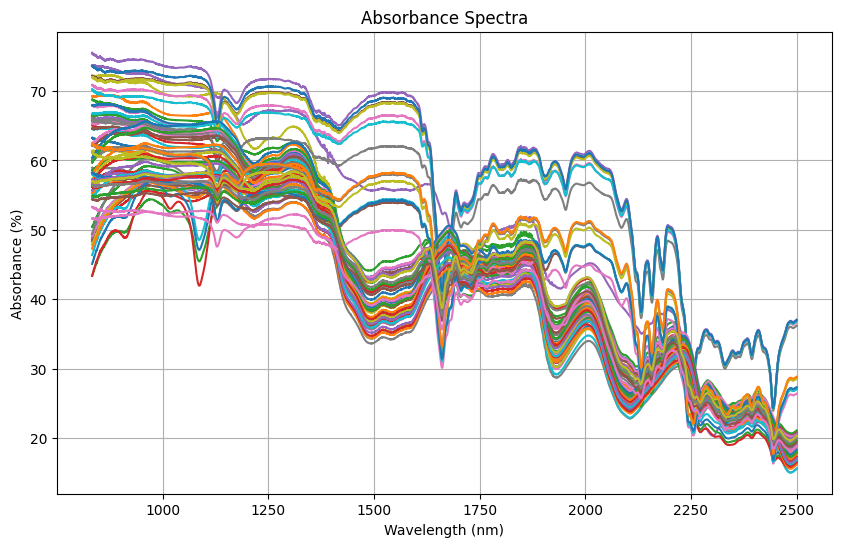

In [20]:
figure_plot(csv_files_3,"Absorbance")

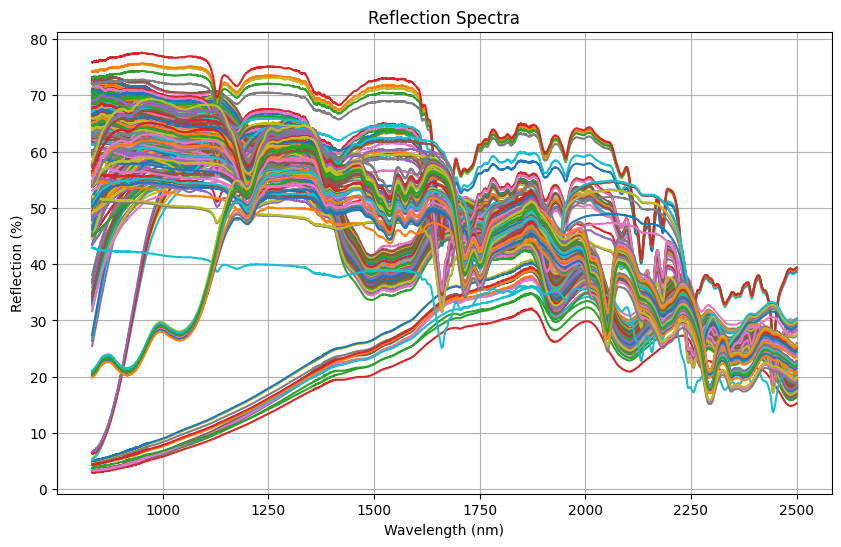

In [21]:
figure_plot(csv_files_1_ref,"Reflection")

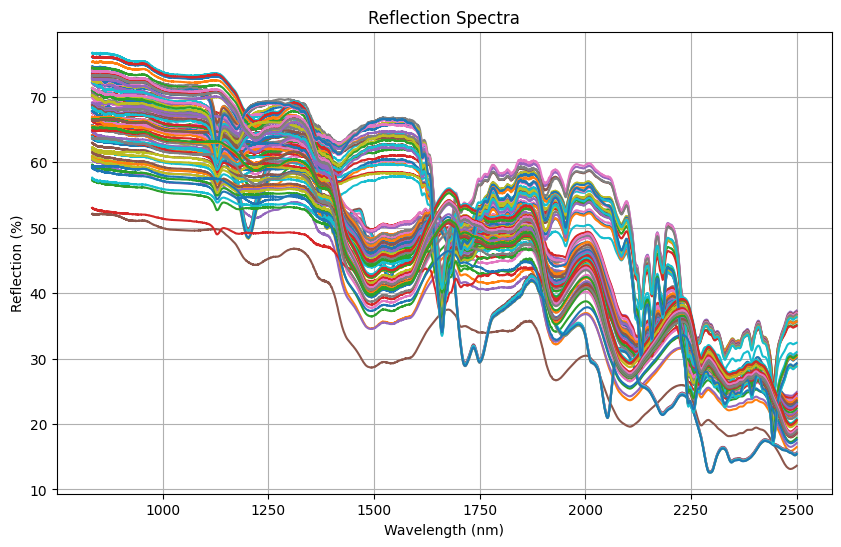

In [22]:
figure_plot(csv_files_2_ref,"Reflection")

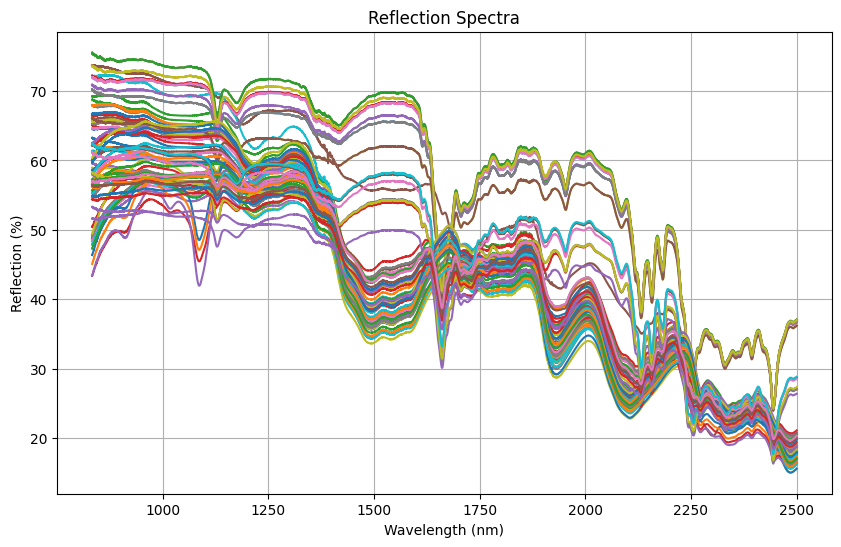

In [23]:
figure_plot(csv_files_3_ref,"Reflection")

### Data Matrix 

In [24]:
def data_extraction(csv_files,Y_axis,fabric_type_1= 'x',fabric_type_2='x',fabric_type_3='x'):
    x_data = []
    y_data = []
    count = 0
    for file_path in csv_files:
        file_name  = os.path.basename(file_path)
        file_name_part = file_name.split("_")
        blend = file_name_part[1]
        sep_blend = [blend[i:i+4] for i in range(0, len(blend), 4)]

        if (sep_blend[0][0] == fabric_type_1 and sep_blend[1][0] == fabric_type_2 and sep_blend[2][0] == fabric_type_3):
            df = pd.read_csv(file_path,header=None)

            df[0] = np.power(10, 7)/df[0]
            if (Y_axis == "Absorbance"):
                y= np.power(10,-df[1])*100

            else:
                y= [df[1]]

            
            x= [df[0]]
            
            x_data.append(x)
            y_data.append(y)

    return x_data,y_data


 

### Data Matrix

In [25]:
def x_y_seperation(csv_file,data_Type,fabric_type_1='x',fabric_type_2='x',fabric_type_3='x'):
    y_data = []
    for j in data_Type:
        if (j == "Absorbance"):
            for i in csv_file[:3]:
                x_data_ext,y_data_ext = data_extraction(i,j,fabric_type_1,fabric_type_2,fabric_type_3)
                # Flatten the extracted data
                for item in y_data_ext:
                    if isinstance(item, list):
                        y_data.extend(item)
                    else:
                        y_data.append(item)
           
        else:
            for i in csv_file[3:]:
                x_data_ext,y_data_ext = data_extraction(i,j,fabric_type_1,fabric_type_2,fabric_type_3)
                # Flatten the extracted data
                for item in y_data_ext:
                    if isinstance(item, list):
                        y_data.extend(item)
                    else:
                        y_data.append(item)
        
    return y_data

csv_file = [csv_files_1,csv_files_2,csv_files_3,csv_files_1_ref,csv_files_2_ref,csv_files_3_ref]
data_Type = ["Absorbance","Reflection"]





In [26]:
# def flatten_data(data_list):
#     flattened = []
#     for item in data_list:
#         if isinstance(item, list) and len(item) > 0:
#             # If item is nested, flatten it
#             if isinstance(item[0], list):
#                 flattened.extend([arr for sublist in item for arr in sublist])
#             else:
#                 flattened.append(item)
#         else:
#             flattened.append(item)
#     return flattened

In [27]:
y_cotton = x_y_seperation(csv_file,data_Type,"a")
y_polyester = x_y_seperation(csv_file,data_Type,"b")
y_nylon = x_y_seperation(csv_file,data_Type,"c")
y_acrylic = x_y_seperation(csv_file,data_Type,"d")
y_cot_spa = x_y_seperation(csv_file,data_Type,"a","e")
y_poly_spa = x_y_seperation(csv_file,data_Type,"b","e")
y_nyl_spa = x_y_seperation(csv_file,data_Type,"c","e")
y_cot_poly = x_y_seperation(csv_file,data_Type,"a","b")
y_poly_cot = x_y_seperation(csv_file,data_Type,"b","a")
y_cot_rpoly = x_y_seperation(csv_file,data_Type,"a","f")
y_poly_cot_new = x_y_seperation(csv_file,data_Type,"b","a")
y_rpoly = x_y_seperation(csv_file,data_Type,"f")


In [28]:
print(len(y_cotton))
print(len(y_polyester))
print(len(y_nylon))
print(len(y_acrylic))
print(len(y_cot_spa))
print(len(y_poly_spa))
print(len(y_nyl_spa))
print(len(y_cot_poly))
print(len(y_poly_cot))
print(len(y_cot_rpoly))
print(len(y_poly_cot_new))
print(len(y_rpoly)) 

445
110
69
13
14
14
14
70
28
13
28
14


In [29]:
y_cotton = y_cotton[:-(len(y_cotton)%6)]
y_polyester = y_polyester[:-(len(y_polyester)%6)]
y_nylon = y_nylon[:-(len(y_nylon)%6)]
y_acrylic = y_acrylic[:-(len(y_acrylic)%6)]
y_cot_spa = y_cot_spa[:-(len(y_cot_spa)%6)]
y_poly_spa = y_poly_spa[:-(len(y_poly_spa)%6)]
y_nyl_spa = y_nyl_spa[:-(len(y_nyl_spa)%6)]
y_cot_poly = y_cot_poly[:-(len(y_cot_poly)%6)]
y_poly_cot = y_poly_cot[:-(len(y_poly_cot)%6)]
y_cot_rpoly = y_cot_rpoly[:-(len(y_cot_rpoly)%6)]
y_poly_cot_new = y_poly_cot_new[:-(len(y_poly_cot_new)%6)] 
y_rpoly = y_rpoly[:-(len(y_rpoly)%6)]

In [30]:
data_len = [len(y_cotton)//6,len(y_polyester)//6,len(y_nylon)//6,len(y_acrylic)//6,len(y_cot_spa)//6,len(y_poly_spa)//6,len(y_nyl_spa)//6,len(y_cot_poly)//6,len(y_poly_cot)//6,len(y_cot_rpoly)//6,len(y_poly_cot_new)//6,len(y_rpoly)//6]

In [31]:
num_sequences = 6
num_fetures = 4149

In [32]:
import torch
from torch import tensor

y_cotton_tensor = tensor(y_cotton).reshape(len(y_cotton)//6, num_sequences, num_fetures)
y_polyester_tensor = tensor(y_polyester).reshape(len(y_polyester)//6, num_sequences, num_fetures)
y_nylon_tensor = tensor(y_nylon).reshape(len(y_nylon)//6, num_sequences, num_fetures)
y_acrylic_tensor = tensor(y_acrylic).reshape(len(y_acrylic)//6, num_sequences, num_fetures)
y_cot_spa_tensor = tensor(y_cot_spa).reshape(len(y_cot_spa)//6, num_sequences, num_fetures)
y_poly_spa_tensor = tensor(y_poly_spa).reshape(len(y_poly_spa)//6, num_sequences, num_fetures)
y_nyl_spa_tensor = tensor(y_nyl_spa).reshape(len(y_nyl_spa)//6, num_sequences, num_fetures)
y_cot_poly_tensor = tensor(y_cot_poly).reshape(len(y_cot_poly)//6, num_sequences, num_fetures)
y_poly_cot_tensor = tensor(y_poly_cot).reshape(len(y_poly_cot)//6, num_sequences, num_fetures)
y_cot_rpoly_tensor = tensor(y_cot_rpoly).reshape(len(y_cot_rpoly)//6, num_sequences, num_fetures)
y_poly_cot_new_tensor = tensor(y_poly_cot_new).reshape(len(y_poly_cot_new)//6, num_sequences, num_fetures)
y_rpoly_tensor = tensor(y_rpoly).reshape(len(y_rpoly)//6, num_sequences, num_fetures)

final_tensor_input_new = torch.cat((y_cotton_tensor,
                                 y_polyester_tensor,
                                 y_nylon_tensor,
                                 y_acrylic_tensor,
                                 y_cot_spa_tensor,
                                 y_poly_spa_tensor,
                                 y_nyl_spa_tensor,
                                 y_cot_poly_tensor,
                                 y_poly_cot_tensor,
                                 y_cot_rpoly_tensor,
                                 y_poly_cot_new_tensor,
                                 y_rpoly_tensor), dim=0).float()    


### PCA Analysis For Absorbtion

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [34]:
data_cotton_pca =y_cotton_tensor.reshape(-1, num_fetures)
data_polyester_pca =y_polyester_tensor.reshape(-1, num_fetures)
data_nylon_pca =y_nylon_tensor.reshape(-1, num_fetures)
data_acrylic_pca =y_acrylic_tensor.reshape(-1, num_fetures)
data_cot_spa_tensor = y_cot_spa_tensor.reshape(-1, num_fetures) 
data_poly_spa_tensor = y_poly_spa_tensor.reshape(-1, num_fetures)
data_nyl_spa_tensor = y_nyl_spa_tensor.reshape(-1, num_fetures)
data_cot_poly_tensor = y_cot_poly_tensor.reshape(-1, num_fetures)
data_poly_cot_tensor = y_poly_cot_tensor.reshape(-1, num_fetures)
data_cot_rpoly_tensor = y_cot_rpoly_tensor.reshape(-1, num_fetures)
data_poly_cot_new_tensor = y_poly_cot_new_tensor.reshape(-1, num_fetures)
data_rpoly_tensor = y_rpoly_tensor.reshape(-1, num_fetures)

data_cotton_pca_np = data_cotton_pca.cpu().numpy()
data_poylester_pca_np = data_polyester_pca.cpu().numpy()
data_nylon_pca_np = data_nylon_pca.cpu().numpy()
data_acrylic_pca_np = data_acrylic_pca.cpu().numpy()
data_cot_spa_tensor_np = data_cot_spa_tensor.cpu().numpy()
data_poly_spa_tensor_np = data_poly_spa_tensor.cpu().numpy()
data_nyl_spa_tensor_np = data_nyl_spa_tensor.cpu().numpy()
data_cot_poly_tensor_np = data_cot_poly_tensor.cpu().numpy()
data_poly_cot_tensor_np = data_poly_cot_tensor.cpu().numpy()
data_cot_rpoly_tensor_np = data_cot_rpoly_tensor.cpu().numpy()
data_poly_cot_new_tensor_np = data_poly_cot_new_tensor.cpu().numpy()
data_rpoly_tensor_np = data_rpoly_tensor.cpu().numpy()

scaler = StandardScaler()
data_cotton_scaled_np = scaler.fit_transform(data_cotton_pca_np)
data_polyester_scaled_np = scaler.fit_transform(data_poylester_pca_np)
data_nylon_scaled_np = scaler.fit_transform(data_nylon_pca_np)
data_acrylic_scaled_np = scaler.fit_transform(data_acrylic_pca_np)
data_cot_spa_scaled_np = scaler.fit_transform(data_cot_spa_tensor_np)
data_poly_spa_scaled_np = scaler.fit_transform(data_poly_spa_tensor_np)
data_nyl_spa_scaled_np = scaler.fit_transform(data_nyl_spa_tensor_np)
data_cot_poly_scaled_np = scaler.fit_transform(data_cot_poly_tensor_np)
data_poly_cot_scaled_np = scaler.fit_transform(data_poly_cot_tensor_np)
data_cot_rpoly_scaled_np = scaler.fit_transform(data_cot_rpoly_tensor_np)
data_poly_cot_new_scaled_np = scaler.fit_transform(data_poly_cot_new_tensor_np)
data_rpoly_scaled_np = scaler.fit_transform(data_rpoly_tensor_np)



In [35]:
import torch

num_components = 6
pca_c = PCA(n_components=num_components)
pca_p = PCA(n_components=num_components)
pca_n = PCA(n_components=num_components)
pca_a = PCA(n_components=num_components)
pca_c_spa = PCA(n_components=num_components)
pca_p_spa = PCA(n_components=num_components)
pca_n_spa = PCA(n_components=num_components)
pca_cot_poly = PCA(n_components=num_components)
pca_poly_cot = PCA(n_components=num_components)
pca_cot_rpoly = PCA(n_components=num_components)
pca_poly_cot_new = PCA(n_components=num_components)
pca_rpoly = PCA(n_components=num_components)

pca_cotton_result_np = pca_c.fit_transform(data_cotton_scaled_np)
pca_polyester_result_np = pca_p.fit_transform(data_polyester_scaled_np)
pca_nylon_result_np = pca_n.fit_transform(data_nylon_scaled_np)
pca_acrylic_result_np = pca_a.fit_transform(data_acrylic_scaled_np)
pca_cot_spa_result_np = pca_c_spa.fit_transform(data_cot_spa_scaled_np)
pca_poly_spa_result_np = pca_p_spa.fit_transform(data_poly_spa_scaled_np)
pca_nyl_spa_result_np = pca_n_spa.fit_transform(data_nyl_spa_scaled_np)
pca_cot_poly_result_np = pca_cot_poly.fit_transform(data_cot_poly_scaled_np)
pca_poly_cot_result_np = pca_poly_cot.fit_transform(data_poly_cot_scaled_np)
pca_cot_rpoly_result_np = pca_cot_rpoly.fit_transform(data_cot_rpoly_scaled_np)
pca_poly_cot_new_result_np = pca_poly_cot_new.fit_transform(data_poly_cot_new_scaled_np)
pca_rpoly_result_np = pca_rpoly.fit_transform(data_rpoly_scaled_np)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pca_cotton_result_tensor = torch.from_numpy(pca_cotton_result_np).float().to(device)
pca_polyester_result_tensor = torch.from_numpy(pca_polyester_result_np).float().to(device)
pca_nylon_result_tensor = torch.from_numpy(pca_nylon_result_np).float().to(device)
pca_acrylic_result_tensor = torch.from_numpy(pca_acrylic_result_np).float().to(device)
pca_cot_spa_result_tensor = torch.from_numpy(pca_cot_spa_result_np).float().to(device)
pca_poly_spa_result_tensor = torch.from_numpy(pca_poly_spa_result_np).float().to(device)
pca_nyl_spa_result_tensor = torch.from_numpy(pca_nyl_spa_result_np).float().to(device)
pca_cot_poly_result_tensor = torch.from_numpy(pca_cot_poly_result_np).float().to(device)
pca_poly_cot_result_tensor = torch.from_numpy(pca_poly_cot_result_np).float().to(device)
pca_cot_rpoly_result_tensor = torch.from_numpy(pca_cot_rpoly_result_np).float().to(device)
pca_poly_cot_new_result_tensor = torch.from_numpy(pca_poly_cot_new_result_np).float().to(device)
pca_rpoly_result_tensor = torch.from_numpy(pca_rpoly_result_np).float().to(device)



In [36]:
final_tensor_cotton = pca_cotton_result_tensor.reshape(66, 3, 6)
final_tensor_polyester = pca_polyester_result_tensor.reshape(15, 3, 6)
final_tensor_nylon = pca_nylon_result_tensor.reshape(9, 3, 6)
final_tensor_acrylic = pca_acrylic_result_tensor.reshape(2, 3, 6)
final_tensor_cot_spa = pca_cot_spa_result_tensor.reshape(2, 3, 6)
final_tensor_poly_spa = pca_poly_spa_result_tensor.reshape(2, 3, 6)
final_tensor_nyl_spa = pca_nyl_spa_result_tensor.reshape(2, 3, 6)
final_tensor_cot_poly = pca_cot_poly_result_tensor.reshape(11, 3, 6)
final_tensor_poly_cot = pca_poly_cot_result_tensor.reshape(4, 3, 6)
final_tensor_cot_rpoly = pca_cot_rpoly_result_tensor.reshape(2, 3, 6)
final_tensor_poly_cot_new = pca_poly_cot_new_result_tensor.reshape(4, 3, 6)
final_tensor_rpoly = pca_rpoly_result_tensor.reshape(2, 3, 6)


RuntimeError: shape '[66, 3, 6]' is invalid for input of size 2664

In [ ]:
print(sum(pca_c.explained_variance_ratio_))
print(sum(pca_p.explained_variance_ratio_))
print(sum(pca_n.explained_variance_ratio_))
print(sum(pca_a.explained_variance_ratio_))
print(sum(pca_c_spa.explained_variance_ratio_))
print(sum(pca_p_spa.explained_variance_ratio_))
print(sum(pca_n_spa.explained_variance_ratio_))
print(sum(pca_cot_poly.explained_variance_ratio_))
print(sum(pca_poly_cot.explained_variance_ratio_))
print(sum(pca_cot_rpoly.explained_variance_ratio_))
print(sum(pca_poly_cot_new.explained_variance_ratio_))
print(sum(pca_rpoly.explained_variance_ratio_))

0.9989061472748691
0.999906658246741
0.9999014746044452
1.0000000000000002
0.9999999999999999
1.0000000000000002
1.0
0.9997219425944577
0.9999845166317161
1.0000000000000002
0.9999845166317155
1.0


In [ ]:
fabric_tensor_input = torch.cat((final_tensor_cotton,
                                final_tensor_polyester,
                                final_tensor_nylon,
                                final_tensor_acrylic,
                                final_tensor_cot_spa,
                                final_tensor_poly_spa,
                                final_tensor_nyl_spa,
                                final_tensor_cot_poly,
                                final_tensor_poly_cot,
                                final_tensor_cot_rpoly,
                                final_tensor_poly_cot_new,
                                final_tensor_rpoly),dim=0)

In [ ]:
fabric_tensor_input.shape

torch.Size([121, 3, 6])

In [ ]:
# plt.scatter(pca_cotton_result_tensor['principal_component_1'],df_pca['principal_component_2'], color = "#C00000")
# plt.xlabel('principal_component_1')
# plt.ylabel('principal_component_2')
# plt.title('PCA decomposition')

In [ ]:
# sum(pca_1.explained_variance_ratio_)

In [ ]:
# pca_2 = PCA(n_components=3).fit(y_cotton_tensor_reshape)
# Y_t = pca_2.transform(y_cotton_tensor_reshape)
# df_pca_3 = pd.DataFrame(Y_t,columns = ['principal_component_1','principal_component_2','principal_component_3'])


In [ ]:
# import plotly.express as px

In [ ]:
# fig = px.scatter_3d(df_pca_3, x = 'principal_component_1', y = 'principal_component_2', z = 'principal_component_3').update_traces(marker = dict(color = "#C00000"))
# fig.show()


In [ ]:
# sum(pca_2.explained_variance_ratio_)

### Y Label

In [37]:
num_copies_raw = data_len
copied_df = uniq_df_abs.loc[uniq_df_abs.index.repeat(num_copies_raw)].reset_index(drop=True)

In [38]:
category_map = {"Cotton":1,
                "Polyester":2,
                "Nylon":3,
                "Acrylic":4,
                "Spandex":5,
                "Recycled Polyester":6,
                "Rayan":7,
                "Empty":8}

fabric_type_comp = [("Fabric_1","Fabric_1_comp"), ("Fabric_2","Fabric_2_comp"), ("Fabric_3","Fabric_3_comp")]

for i,j in fabric_type_comp:
    copied_df[i] = copied_df[i].map(category_map).astype('float32')
    copied_df[j] = copied_df[j].astype('float32')


In [39]:
copied_df

,Fabric_1,Fabric_2,Fabric_3,Fabric_1_comp,Fabric_2_comp,Fabric_3_comp
0,1.0,8.0,8.0,100.0,0.0,0.0
1,1.0,8.0,8.0,100.0,0.0,0.0
2,1.0,8.0,8.0,100.0,0.0,0.0
3,1.0,8.0,8.0,100.0,0.0,0.0
4,1.0,8.0,8.0,100.0,0.0,0.0
...,...,...,...,...,...,...
129,2.0,1.0,7.0,53.0,35.0,12.0
130,2.0,1.0,7.0,53.0,35.0,12.0
131,2.0,1.0,7.0,53.0,35.0,12.0
132,6.0,8.0,8.0,100.0,0.0,0.0


In [40]:
copied_df.dtypes

Fabric_1         float32
Fabric_2         float32
Fabric_3         float32
Fabric_1_comp    float32
Fabric_2_comp    float32
Fabric_3_comp    float32
dtype: object

In [41]:
# cotton_out = copied_df[0:74]
# polyester_out = copied_df[66:81]
# nylon_out = copied_df[81:90]
# acrylic_out = copied_df[90:92]
# cotton_spandex_out = copied_df[92:94]
# polyester_spandex_out = copied_df[94:96]
# nylon_spandex_out = copied_df[96:98]
# cotton_polyester_out = copied_df[98:109]
# polyester_cotton_out = copied_df[109:113]
# cotton_recycled_polyester_out = copied_df[113:115]
# polyester_cotton_new_out = copied_df[115:119]
# recycled_polyester_out = copied_df[119:121]

# final_out_df = pd.concat([cotton_out,
#                          polyester_out,
#                          nylon_out,
#                          acrylic_out,
#                          cotton_spandex_out,
#                          polyester_spandex_out,
#                          nylon_spandex_out,
#                          cotton_polyester_out,
#                          polyester_cotton_out,
#                          cotton_recycled_polyester_out,
#                          polyester_cotton_new_out,
#                          recycled_polyester_out], axis=0)

In [42]:

final_out_tensor = torch.tensor(copied_df.values)

### ML Model 

In [43]:
import torch
from torch import optim,nn
from torch.utils.data import DataLoader,TensorDataset
import torch.nn.functional as F
from sklearn.model_selection import train_test_split


In [44]:
x_train,x_testval,y_train,y_testval = train_test_split(final_tensor_input_new,final_out_tensor,test_size=0.3,random_state=42)
x_val,x_test,y_val,y_test = train_test_split(x_testval,y_testval,test_size=0.5,random_state=42)

In [45]:
x_train = x_train.unsqueeze(1)
x_val = x_val.unsqueeze(1)
x_test = x_test.unsqueeze(1)

In [46]:
train_dataset = TensorDataset(x_train,y_train)
val_dataset = TensorDataset(x_val,y_val)
test_dataset = TensorDataset(x_test,y_test)

batch_size = 1
train_load = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
val_load = DataLoader(val_dataset,batch_size=batch_size,shuffle=True)
test_load = DataLoader(test_dataset,batch_size=batch_size,shuffle=True)

In [ ]:
class FabricClassifier(nn.Module):
    def __init__(self):
        super(FabricClassifier,self).__init__()
        self.conv1 = nn.Conv2d(1,16, kernel_size=(1,1), stride=1)
        self.pool1 = nn.MaxPool2d(kernel_size = (2,2))
        self.conv2 = nn.Conv2d(16,32, kernel_size=(1,1), stride=1)
        self.pool2 = nn.MaxPool2d(kernel_size = (2,2))
        self.fc1 = nn.Linear(33184, 256)
        self.fc2 = nn.Linear(256, 128)

        # seperate output layers
        self.fabric_cls = nn.Linear(128, 3)
        self.fabric_comp = nn.Linear(128, 3)
        
        self.dropout = nn.Dropout(0.25)

    def forward(self,x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(-1, 33184)

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)

        fabric_logits = self.fabric_cls(x)
        fabric_composition = self.fabric_comp(x)

        output = torch.cat([fabric_logits, fabric_composition], dim=1)

        return output



In [302]:
def _calculate_flattened_size():
    conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(1, 1), padding=0)
    pool1 = nn.MaxPool2d(kernel_size=(2, 2))
    conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(1, 1), padding=0)
    pool2 = nn.MaxPool2d(kernel_size=(2, 2))
    # Pass a dummy tensor to calculate the size after conv and pooling layers
    x = torch.rand(10, 1, 6, 4149) # Single sample
    x = pool1(F.relu(conv1(x)))
    x = pool2(F.relu(conv2(x)))
    to_linear = x.numel() // x.shape[0] # Divide by batch size (which is 1 here)
    print(f"Calculated flattened size for linear layer: {to_linear}")

_calculate_flattened_size()

Calculated flattened size for linear layer: 33184


In [303]:
fabric_model = FabricClassifier()

In [304]:
Fabric_criterion = nn.CrossEntropyLoss()
composition_criterion = nn.MSELoss()
optimizer = optim.Adam(fabric_model.parameters(), lr=0.001)

In [305]:
def train(model,train_dataset,optimizer,epochs):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    for epoch in range(epochs):
        running_fabric_loss = 0
        running_composition_loss = 0
        correct_fabric = 0
        total_composition_error =0
        total = 0

        for inputs,labels in train_dataset:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            fabric_logits = outputs[:, :3]
            fabric_composition = outputs[:, 3:]

            fabric_loss = Fabric_criterion(fabric_logits, labels[:, :3])
            composition_loss = composition_criterion(fabric_composition, labels[:, 3:])

            total_loss = fabric_loss

            total_loss.backward()
            optimizer.step()

            # Track accuracy
            _, fabric_preds = torch.max(fabric_logits, 1)
            correct_fabric += (fabric_preds == labels[:,:3].argmax(dim = 1)).sum().item()
            total += labels[:,:3].size(0)

            composition_error = torch.abs(fabric_composition - labels[:, 3:]).mean().item()
            total_composition_error += composition_error
            
            running_fabric_loss += fabric_loss.item()
            running_composition_loss += composition_loss.item()
        
        # Epoch statistics
        epoch_fabric_loss = running_fabric_loss / len(train_dataset)
        epoch_composition_loss = running_composition_loss / len(train_dataset)
        fabric_acc = 100 * correct_fabric / total
        avg_composition_error = total_composition_error / len(train_dataset)

        print(f"Epoch {epoch+1}/{epochs}:")
        print(f"  Fabric Loss: {epoch_fabric_loss:.4f}, Accuracy: {fabric_acc:.2f}%")
        print(f"  Composition Loss: {epoch_composition_loss:.4f}, Avg Error: {avg_composition_error:.4f}")

In [ ]:
train(fabric_model, train_load, optimizer, epochs=500)